# Part 1 - Data Cleaning

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('Red.csv')

In [3]:
raw_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8666,8666,8666,8666,8666.000000,8666.000000,8666.000000,8666
unique,6721,30,624,2714,NaN,NaN,NaN,32
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,2016
freq,43,2650,325,40,NaN,NaN,NaN,1776
mean,NaN,NaN,NaN,NaN,3.890342,415.287445,39.145065,NaN
std,NaN,NaN,NaN,NaN,0.308548,899.726373,84.936307,NaN
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,NaN
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.680000,NaN
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,NaN
75%,NaN,NaN,NaN,NaN,4.100000,401.000000,38.142500,NaN


In [5]:
raw_data.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

#### Converting Year to Float from Object

In [6]:
raw_data['Year'] = pd.to_numeric(raw_data['Year'], errors='coerce')

### Dealing with missing values

In [7]:
raw_data.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               8
dtype: int64

In [8]:
data_no_mv = raw_data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8658,8658,8658,8658,8658.000000,8658.000000,8658.000000,8658.000000
unique,6713,30,623,2713,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2646,325,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.890148,409.761839,39.149789,2014.818434
std,NaN,NaN,NaN,NaN,0.308429,857.614243,84.963503,3.281252
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.682500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,400.750000,38.227500,2017.000000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

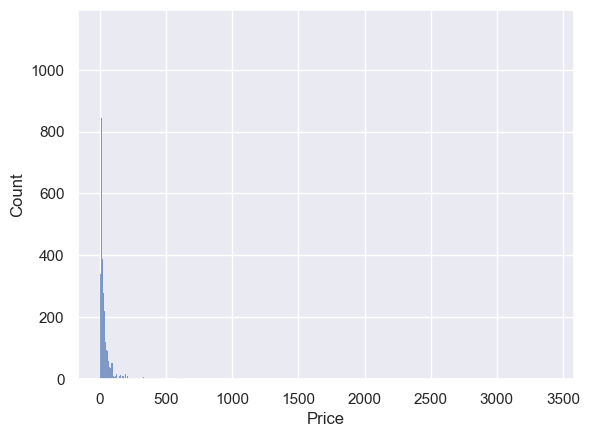

In [10]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
# Declare a variable that will be equal to the 90th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8569,8569,8569,8569,8569.000000,8569.000000,8569.000000,8569.000000
unique,6645,30,622,2705,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2621,324,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.883265,408.679543,32.801334,2014.887618
std,NaN,NaN,NaN,NaN,0.302179,858.340450,41.487180,3.145528
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.630000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,398.000000,37.450000,2017.000000


<Axes: xlabel='Price', ylabel='Count'>

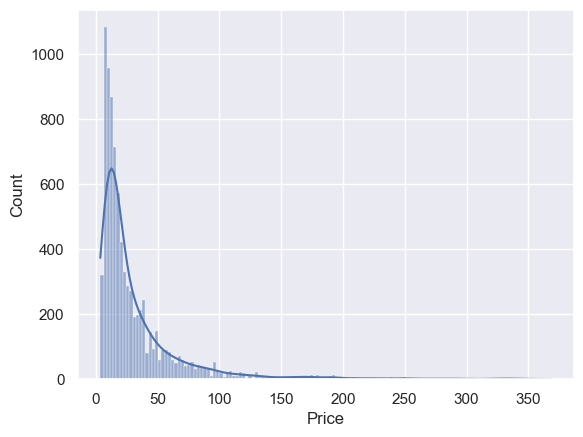

In [12]:
sns.histplot(data_1['Price'],kde=True)

<Axes: xlabel='Rating', ylabel='Count'>

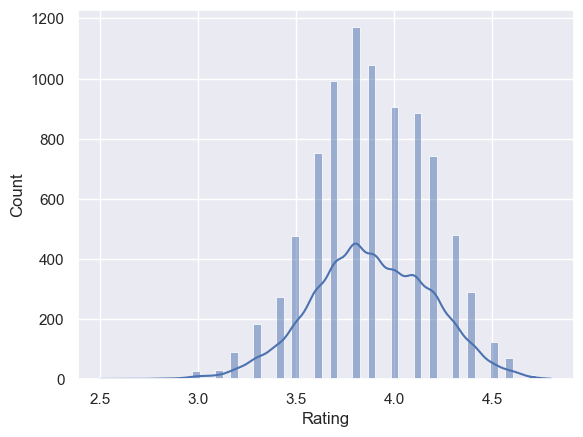

In [13]:
sns.histplot(data_1['Rating'],kde=True)

<Axes: xlabel='NumberOfRatings', ylabel='Count'>

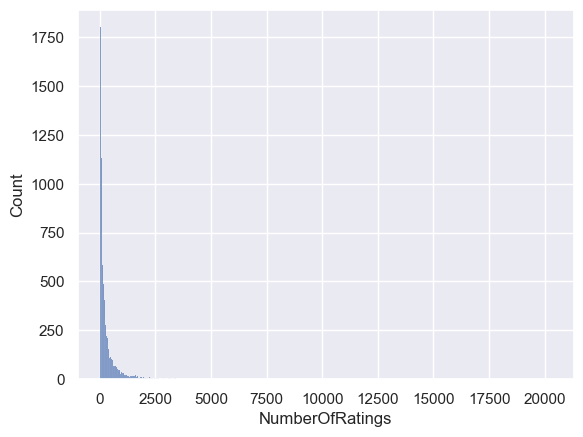

In [14]:
sns.histplot(data_1['NumberOfRatings'])

In [15]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_1['NumberOfRatings'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_2 = data_1[data_1['NumberOfRatings']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_2.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8483,8483,8483,8483,8483.000000,8483.000000,8483.000000,8483.000000
unique,6590,30,620,2702,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2594,307,39,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.882200,347.929506,32.771766,2014.884239
std,NaN,NaN,NaN,NaN,0.302133,519.387969,41.210753,3.151715
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.650000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,154.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,383.500000,37.615000,2017.000000


<Axes: xlabel='NumberOfRatings', ylabel='Count'>

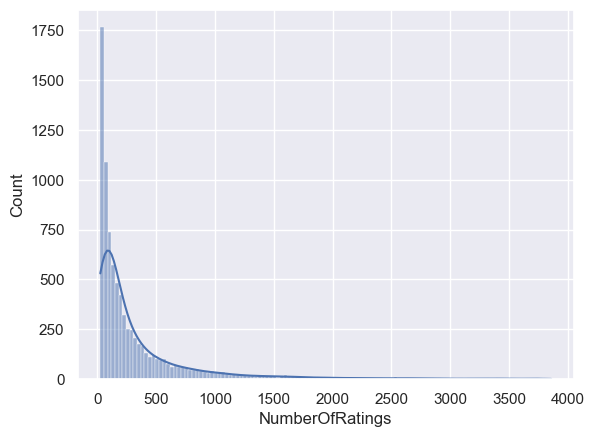

In [16]:
sns.histplot(data_2['NumberOfRatings'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

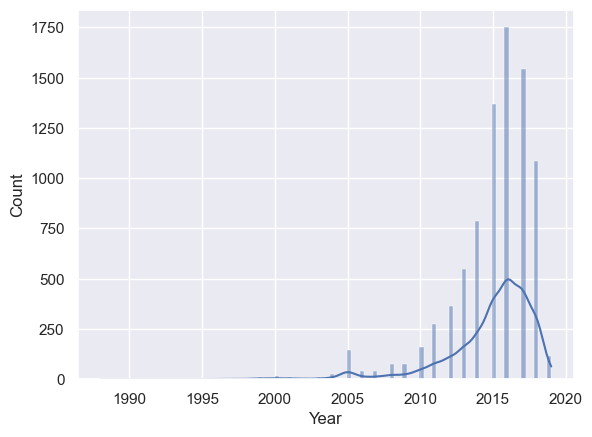

In [17]:
sns.histplot(data_2['Year'], kde=True)

In [18]:
# Outliers are on the low end, Taking off very old vintage wines
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

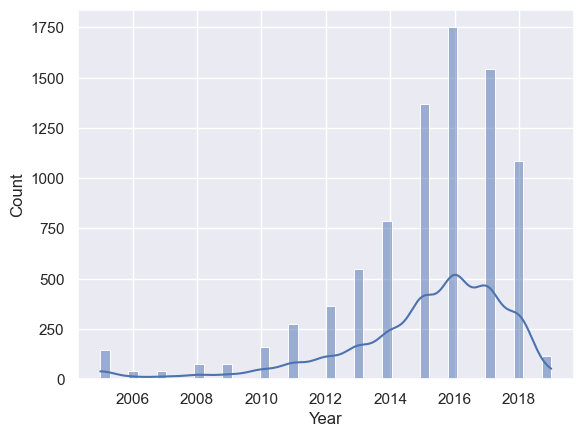

In [19]:
sns.histplot(data_3['Year'], kde=True)

In [20]:
data_cleaned = data_3.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,31.977637,2015.064813
std,NaN,NaN,NaN,NaN,0.301340,517.363200,40.168796,2.701226
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,2005.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.522500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,17.890000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,36.740000,2017.000000


# Part 2 - Checking the OLS assumptions

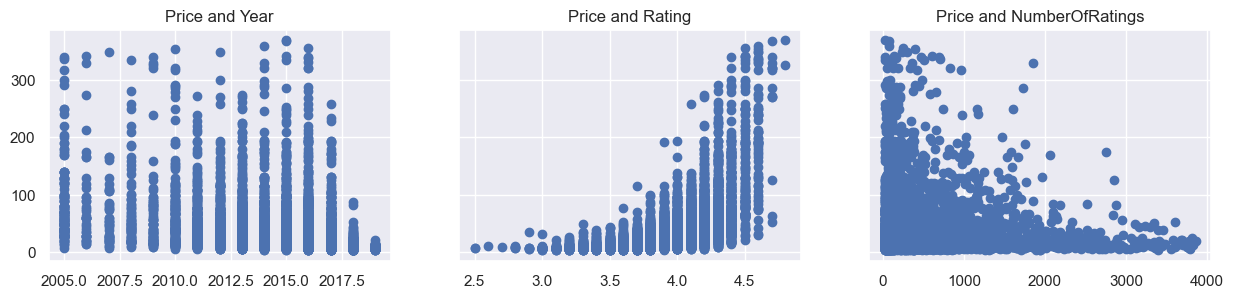

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['Price'])
ax2.set_title('Price and Rating')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['Price'])
ax3.set_title('Price and NumberOfRatings')

plt.show()

### Relaxing the assumptions

In [23]:
# transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455
...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161


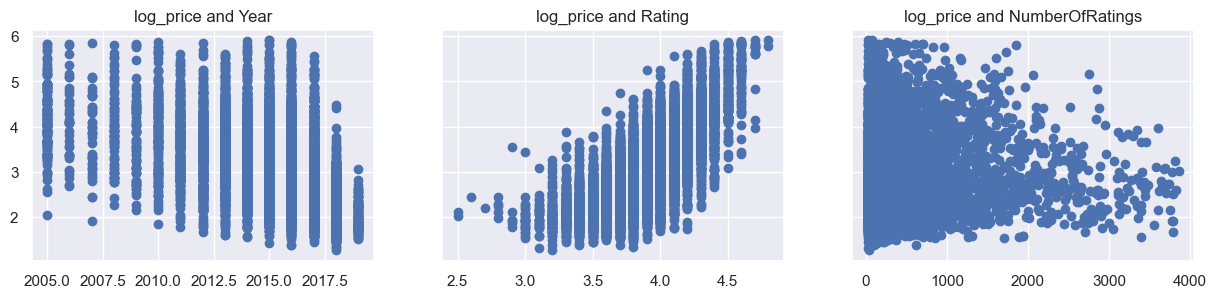

In [24]:
# Build Scatter Plots with log_price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['log_price'])
ax3.set_title('log_price and NumberOfRatings')


plt.show()

In [25]:
# Let's transform 'log_NumberOfRatings' with a log transformation
log_NumberOfRatings = np.log(data_cleaned['NumberOfRatings'])

# Then we add it to our data frame
data_cleaned['log_NumberOfRatings'] = log_NumberOfRatings
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170
...,...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753


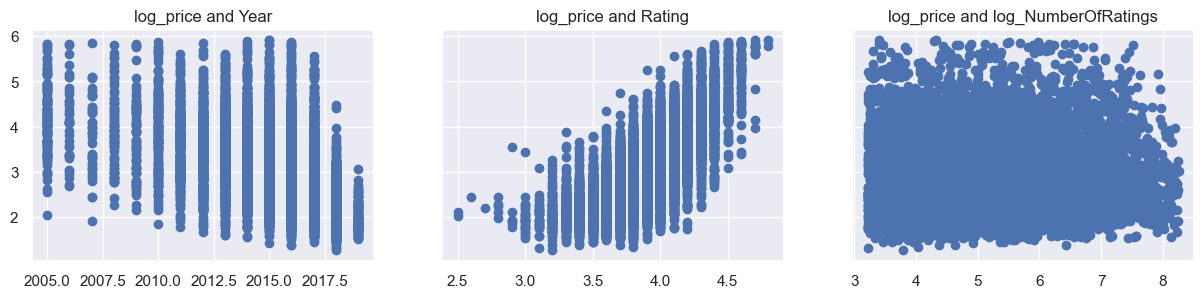

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')
ax3.scatter(data_cleaned['log_NumberOfRatings'],data_cleaned['log_price'])
ax3.set_title('log_price and log_NumberOfRatings')

plt.show()

In [27]:
# Let's transform 'Year' with a log transformation
log_year = np.log(data_cleaned['Year'])

# Then we add it to our data frame
data_cleaned['log_year'] = log_year
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,log_year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170,7.606387
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170,7.609367
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170,7.608374
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170,7.610358
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170,7.608871
...,...,...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737,7.608871
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743,7.608871
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747,7.605890
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753,7.610358


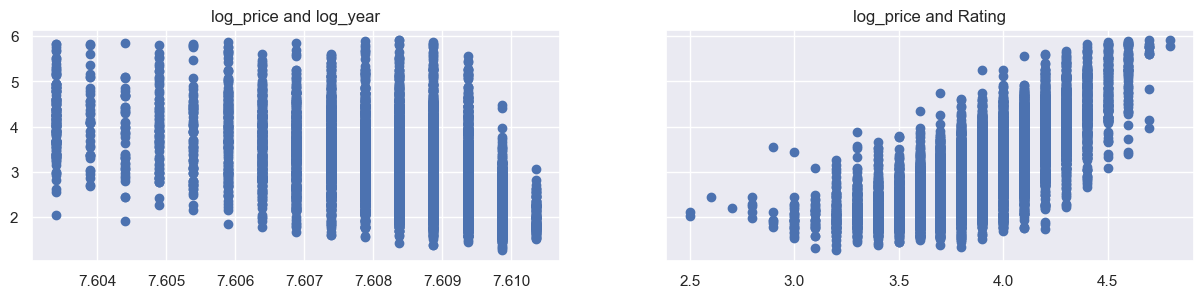

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['log_year'],data_cleaned['log_price'])
ax1.set_title('log_price and log_year')
ax2.scatter(data_cleaned['Rating'],data_cleaned['log_price'])
ax2.set_title('log_price and Rating')

plt.show()

In [29]:
## drop log_NumberOfRatings and Price from the data
data_cleaned = data_cleaned.drop(['Price','log_NumberOfRatings'],axis=1)

In [30]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Year,log_price,log_year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,2015.064813,3.031069,7.608406
std,NaN,NaN,NaN,NaN,0.301340,517.363200,2.701226,0.862471,0.001342
min,NaN,NaN,NaN,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,2014.000000,2.353516,7.607878
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,2016.000000,2.884242,7.608871
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,2017.000000,3.603866,7.609367


### Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# we will explore only numerical data so far
variables = data_cleaned[['Rating','Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [32]:
vif

,VIF,Features
0,164.841865,Rating
1,164.841865,Year


In [33]:
# vif is very high, we will check simple correlation
data_cleaned[['Rating', 'Year']].corr()

,Rating,Year
Rating,1.000000,-0.314357
Year,-0.314357,1.000000


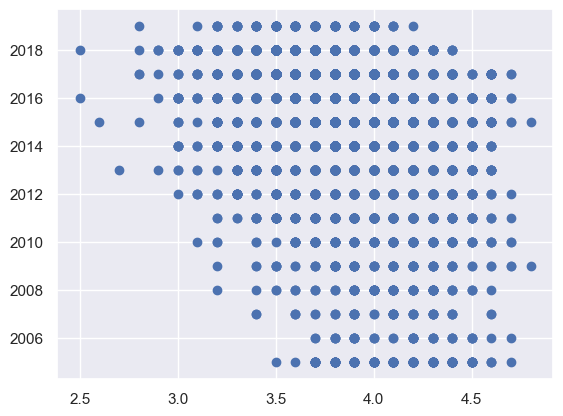

In [34]:
plt.scatter(data_cleaned['Rating'],data_cleaned['Year'])

In [35]:
## Year and Rating do not have significant correlation, the VIF is high due to different data scale
data_no_multicollinearity = data_cleaned

# Part 3 - Create Dummy Variables

In [36]:
data_no_multicollinearity.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Year,log_price,log_year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,2015.064813,3.031069,7.608406
std,NaN,NaN,NaN,NaN,0.301340,517.363200,2.701226,0.862471,0.001342
min,NaN,NaN,NaN,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,2014.000000,2.353516,7.607878
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,2016.000000,2.884242,7.608871
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,2017.000000,3.603866,7.609367


In [37]:
## Leave only Country as a dummy variable

In [38]:
data_no_multicollinearity.drop(['Name','Region','Winery'],axis=1,inplace=True)
data_no_multicollinearity.describe(include='all')

,Country,Rating,NumberOfRatings,Year,log_price,log_year
count,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,30,NaN,NaN,NaN,NaN,NaN
top,Italy,NaN,NaN,NaN,NaN,NaN
freq,2587,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.878503,347.829076,2015.064813,3.031069,7.608406
std,NaN,0.301340,517.363200,2.701226,0.862471,0.001342
min,NaN,2.500000,25.000000,2005.000000,1.266948,7.603399
25%,NaN,3.700000,65.000000,2014.000000,2.353516,7.607878
50%,NaN,3.900000,155.000000,2016.000000,2.884242,7.608871
75%,NaN,4.100000,385.000000,2017.000000,3.603866,7.609367


In [39]:
## Inspecting Country column 

In [40]:
print("🔍 Unique countries and their counts:")
print(data_no_multicollinearity['Country'].value_counts(dropna=False))

🔍 Unique countries and their counts:
Country
Italy            2587
France           2140
Spain            1099
South Africa      495
United States     353
Chile             316
Germany           248
Australia         240
Argentina         235
Portugal          227
Austria           220
New Zealand        63
Brazil             39
Romania            23
Israel             13
Greece             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Lebanon             6
Turkey              6
Georgia             5
Uruguay             4
Croatia             2
Bulgaria            2
Canada              2
Mexico              1
China               1
Slovakia            1
Name: count, dtype: int64


In [41]:
print("Number of null (missing) values in 'Country':")
print(data_no_multicollinearity['Country'].isnull().sum())

Number of null (missing) values in 'Country':
0


In [42]:
## Group Countries with less than 100 wines into Other group to eliminate Noise and avoid overfitting
# Count how many times each country appears
country_counts = data_no_multicollinearity['Country'].value_counts()

# Define a threshold (e.g., < 100)
threshold = 100
rare_countries = country_counts[country_counts < threshold].index

# Replace rare countries with 'Other'
data_no_multicollinearity['Country_cleaned'] = data_no_multicollinearity['Country'].replace(rare_countries, 'Other')

In [43]:
data_no_multicollinearity.head()

,Country,Rating,NumberOfRatings,Year,log_price,log_year,Country_cleaned
0,France,4.2,100,2011.0,4.553877,7.606387,France
1,France,4.3,100,2017.0,2.740840,7.609367,France
2,Italy,3.9,100,2015.0,2.008214,7.608374,Italy
3,Italy,3.5,100,2019.0,2.165619,7.610358,Italy
4,Austria,3.9,100,2016.0,3.372455,7.608871,Austria


In [44]:
print("🔍 Unique countries and their counts:")
print(data_no_multicollinearity['Country_cleaned'].value_counts(dropna=False))

🔍 Unique countries and their counts:
Country_cleaned
Italy            2587
France           2140
Spain            1099
South Africa      495
United States     353
Chile             316
Germany           248
Australia         240
Argentina         235
Portugal          227
Austria           220
Other             218
Name: count, dtype: int64


In [45]:
# Drop the original 'Country' column
data_no_multicollinearity = data_no_multicollinearity.drop('Country', axis=1)

# Rename 'Country_cleaned' to 'Country'
data_no_multicollinearity = data_no_multicollinearity.rename(columns={'Country_cleaned': 'Country'})

In [46]:
# Create Dummy Variables and make sure one of dominant ones is out

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [47]:
data_with_dummies.head()

,Rating,NumberOfRatings,Year,log_price,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,4.2,100,2011.0,4.553877,7.606387,False,False,False,True,False,False,False,False,False,False,False
1,4.3,100,2017.0,2.740840,7.609367,False,False,False,True,False,False,False,False,False,False,False
2,3.9,100,2015.0,2.008214,7.608374,False,False,False,False,False,True,False,False,False,False,False
3,3.5,100,2019.0,2.165619,7.610358,False,False,False,False,False,True,False,False,False,False,False
4,3.9,100,2016.0,3.372455,7.608871,False,True,False,False,False,False,False,False,False,False,False


In [48]:
data_with_dummies.describe(include='all')

,Rating,NumberOfRatings,Year,log_price,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,8138,8158,8062,6238,8130,5791,8160,8151,7883,7279,8025
mean,3.878503,347.829076,2015.064813,3.031069,7.608406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.301340,517.363200,2.701226,0.862471,0.001342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.500000,25.000000,2005.000000,1.266948,7.603399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.700000,65.000000,2014.000000,2.353516,7.607878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.900000,155.000000,2016.000000,2.884242,7.608871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.100000,385.000000,2017.000000,3.603866,7.609367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rearrange a bit

In [49]:
data_with_dummies.columns.values

array(['Rating', 'NumberOfRatings', 'Year', 'log_price', 'log_year',
       'Country_Australia', 'Country_Austria', 'Country_Chile',
       'Country_France', 'Country_Germany', 'Country_Italy',
       'Country_Other', 'Country_Portugal', 'Country_South Africa',
       'Country_Spain', 'Country_United States'], dtype=object)

In [50]:
## Create a variable with preferred oreder of columns
cols = ['log_price','Rating', 'NumberOfRatings', 'Year', 'log_year',
       'Country_Australia', 'Country_Austria', 'Country_Chile',
       'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Portugal', 'Country_South Africa',
       'Country_Spain', 'Country_United States','Country_Other']

In [51]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Rating,NumberOfRatings,Year,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Portugal,Country_South Africa,Country_Spain,Country_United States,Country_Other
0,4.553877,4.2,100,2011.0,7.606387,False,False,False,True,False,False,False,False,False,False,False
1,2.740840,4.3,100,2017.0,7.609367,False,False,False,True,False,False,False,False,False,False,False
2,2.008214,3.9,100,2015.0,7.608374,False,False,False,False,False,True,False,False,False,False,False
3,2.165619,3.5,100,2019.0,7.610358,False,False,False,False,False,True,False,False,False,False,False
4,3.372455,3.9,100,2016.0,7.608871,False,True,False,False,False,False,False,False,False,False,False


In [52]:
## Convert dummy values from booleans into integers
data_preprocessed = data_preprocessed.astype({col: int for col in data_preprocessed.select_dtypes(include='bool').columns})

In [53]:
data_preprocessed.head()

,log_price,Rating,NumberOfRatings,Year,log_year,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Portugal,Country_South Africa,Country_Spain,Country_United States,Country_Other
0,4.553877,4.2,100,2011.0,7.606387,0,0,0,1,0,0,0,0,0,0,0
1,2.740840,4.3,100,2017.0,7.609367,0,0,0,1,0,0,0,0,0,0,0
2,2.008214,3.9,100,2015.0,7.608374,0,0,0,0,0,1,0,0,0,0,0
3,2.165619,3.5,100,2019.0,7.610358,0,0,0,0,0,1,0,0,0,0,0
4,3.372455,3.9,100,2016.0,7.608871,0,1,0,0,0,0,0,0,0,0,0


### Check VIF of independent variables

In [54]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price','log_year'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,171.190985,Rating
1,1.548755,NumberOfRatings
2,199.847631,Year
3,2.032798,Country_Australia
4,1.966257,Country_Austria
5,2.349791,Country_Chile
6,10.269249,Country_France
7,2.095364,Country_Germany
8,12.171010,Country_Italy
9,1.972998,Country_Portugal


In [55]:
# Wild numbers, will try possible combinations to optimize
# Rating correlates with Year, so get rid of Rating
variables = data_preprocessed.drop(['log_price','log_year','Rating'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.540401,NumberOfRatings
1,37.359650,Year
2,2.032579,Country_Australia
3,1.966255,Country_Austria
4,2.348725,Country_Chile
5,10.231533,Country_France
6,2.095349,Country_Germany
7,12.128866,Country_Italy
8,1.970952,Country_Portugal
9,3.146262,Country_South Africa


In [56]:
# Year might be correlating with Countries as some are predominantly producing old wines and other rather young
variables = data_preprocessed.drop(['log_price','log_year','Year'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,32.002557,Rating
1,1.547603,NumberOfRatings
2,1.853633,Country_Australia
3,1.786881,Country_Austria
4,2.074117,Country_Chile
5,8.985646,Country_France
6,1.887535,Country_Germany
7,10.611702,Country_Italy
8,1.827736,Country_Portugal
9,2.796808,Country_South Africa


In [57]:
# drop log_year as no difference from Year
data_preprocessed = data_preprocessed.drop(['log_year','Year'],axis=1)
data_preprocessed

,log_price,Rating,NumberOfRatings,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Portugal,Country_South Africa,Country_Spain,Country_United States,Country_Other
0,4.553877,4.2,100,0,0,0,1,0,0,0,0,0,0,0
1,2.740840,4.3,100,0,0,0,1,0,0,0,0,0,0,0
2,2.008214,3.9,100,0,0,0,0,0,1,0,0,0,0,0
3,2.165619,3.5,100,0,0,0,0,0,1,0,0,0,0,0
4,3.372455,3.9,100,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,2.801541,3.8,994,0,0,0,0,0,0,0,0,0,1,0
8374,3.000222,4.0,995,0,0,0,0,0,1,0,0,0,0,0
8375,3.175968,3.7,996,0,0,0,1,0,0,0,0,0,0,0
8376,1.826161,3.5,998,1,0,0,0,0,0,0,0,0,0,0


# Part 4 - Linear Regression Model

### Declare the inputs and the targets

In [58]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [59]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [60]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [61]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [62]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

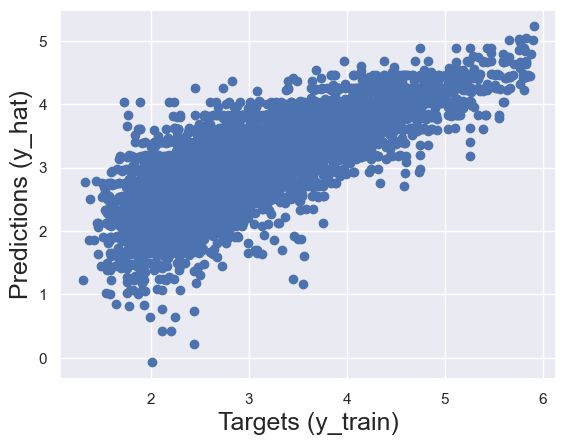

In [64]:
# Compare the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

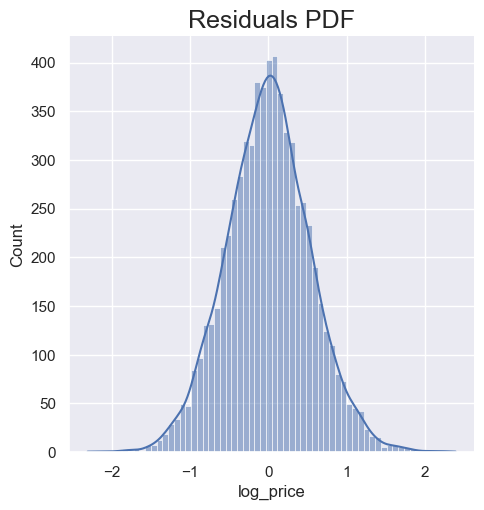

In [65]:
# Another useful check of our model is a residual plot
# Plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

# The plot is normally distributed
# There is no disbalance between overpredictions and underpredictions

In [66]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.6159897806804129

### Finding the weights and bias

In [67]:
# Obtain the bias (intercept) of the regression
reg.intercept_

3.0360861035208604

In [68]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 0.64086198, -0.04399662,  0.05219846,  0.02172282,  0.01090808,
        0.20087332,  0.03649758,  0.01786482, -0.03008296, -0.00860435,
       -0.00362183,  0.07408545,  0.0578249 ])

In [94]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Rating,0.64
1,NumberOfRatings,-0.04
2,Country_Australia,0.05
3,Country_Austria,0.02
4,Country_Chile,0.01
5,Country_France,0.20
6,Country_Germany,0.04
7,Country_Italy,0.02
8,Country_Portugal,-0.03
9,Country_South Africa,-0.01


## Testing

In [70]:
# Our test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

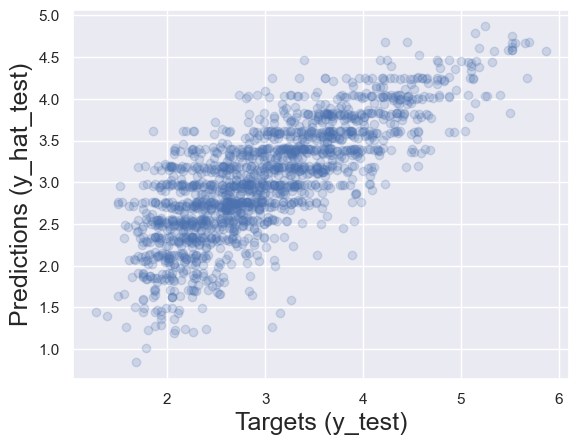

In [71]:
# Create a scatter plot with the test targets and the test predictions
# Include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [72]:
# Manually check these predictions
# To obtain the actual prices, take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,68.453556
1,15.545531
2,19.746326
3,19.179087
4,19.369230


In [73]:
# Include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,68.453556,NaN
1,15.545531,NaN
2,19.746326,NaN
3,19.179087,NaN
4,19.369230,NaN
...,...,...
1671,7.766717,NaN
1672,18.009597,NaN
1673,129.876989,NaN
1674,12.522879,NaN


In [74]:
# Override the original indexing to get correct Target values
y_test = y_test.reset_index(drop=True)
y_test.head()

0    4.757805
1    2.524928
2    3.269949
3    1.515127
4    3.146305
Name: log_price, dtype: float64

In [75]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,68.453556,116.49
1,15.545531,12.49
2,19.746326,26.31
3,19.179087,4.55
4,19.369230,23.25
...,...,...
1671,7.766717,7.25
1672,18.009597,18.99
1673,129.876989,189.95
1674,12.522879,5.98


In [76]:
# Calculate the difference between the targets and the predictions
# This is actually the residual ( already plotted before)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [77]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,68.453556,116.49,48.036444,41.236539
1,15.545531,12.49,-3.055531,24.463819
2,19.746326,26.31,6.563674,24.947451
3,19.179087,4.55,-14.629087,321.518394
4,19.369230,23.25,3.880770,16.691486
...,...,...,...,...
1671,7.766717,7.25,-0.516717,7.127127
1672,18.009597,18.99,0.980403,5.162731
1673,129.876989,189.95,60.073011,31.625697
1674,12.522879,5.98,-6.542879,109.412685


In [78]:
# Exploring the descriptives
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1676.000000,1676.000000,1676.000000,1676.000000
mean,25.476836,29.723079,4.246243,46.895248
std,17.889483,35.337107,24.253254,50.673282
min,2.318420,3.550000,-56.894340,0.158722
25%,12.786805,10.245000,-5.818582,15.513081
50%,19.631598,17.745000,-0.474598,32.473694
75%,32.949616,34.635000,6.380667,57.490331
max,129.876989,355.800000,259.413668,481.237563


In [79]:
# Check outputs manually
# Display all rows
pd.set_option('display.max_rows', None)
# Display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1318,33.95,33.90,-0.05,0.16
559,29.95,29.90,-0.05,0.17
1496,29.90,29.95,0.05,0.17
46,29.95,29.90,-0.05,0.17
1608,35.06,35.00,-0.06,0.18
423,15.87,15.90,0.03,0.19
1406,11.62,11.60,-0.02,0.20
997,18.99,18.95,-0.04,0.21
97,11.50,11.47,-0.03,0.30
472,8.32,8.29,-0.03,0.36


Text(0.5, 1.0, 'Residuals Testing PDF')

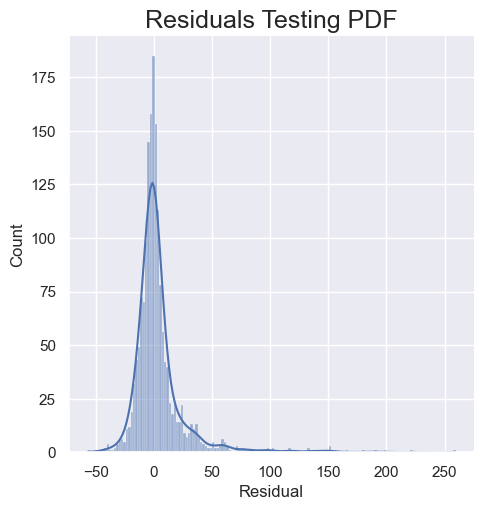

In [80]:
sns.displot(df_pf['Residual'], kde=True)
# Include a title
plt.title("Residuals Testing PDF", size=18)

In [81]:
# Outliers on the positive side indicate that model is predicting lower prices than target
# Probably some variable is missing that drives the prices higher
# Despite higher VIF Year might be worthy to include since it's the prediction and not inference that matters
# The dummy variable if_vintage can also explain higher target prices

# Part 5 - Analysis & Summary

### Calculate Adjusted R-Squared

In [84]:
reg.score(x_train,y_train)

0.6159897806804129

In [82]:
# Calculating adjusted
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [83]:
adj_r2(x_train,y_train)

0.6152433493330511

In [95]:
# R-squared is only slightly larger than the Adjusted R-squared, 
# implying that we were not penalized a lot for the inclusion of independent variables.

### Calculate P-values of Coefficients

In [85]:
# Performed through Feature Selection

In [86]:
from sklearn.feature_selection import f_regression

In [87]:
f_regression(x_train, y_train)

(array([8.43518536e+03, 4.62053455e-01, 1.39449268e-01, 6.49807539e+00,
        4.51318675e+01, 4.50138218e+02, 6.22664972e+00, 8.41544296e+00,
        2.95212212e+01, 3.76687228e+01, 1.13991665e+02, 4.70267487e+01,
        3.51098188e+00]),
 array([0.00000000e+00, 4.96689332e-01, 7.08840944e-01, 1.08212275e-02,
        1.99343441e-11, 9.67466791e-97, 1.26080348e-02, 3.73258160e-03,
        5.72545140e-08, 8.86244480e-10, 2.13136502e-26, 7.62826269e-12,
        6.10068068e-02]))

In [88]:
p_values = f_regression(x_train, y_train)[1]
p_values.round(3)

array([0.   , 0.497, 0.709, 0.011, 0.   , 0.   , 0.013, 0.004, 0.   ,
       0.   , 0.   , 0.   , 0.061])

In [91]:
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Weights,p-values
0,Rating,0.64,0.00
1,NumberOfRatings,-0.04,0.50
2,Country_Australia,0.05,0.71
3,Country_Austria,0.02,0.01
4,Country_Chile,0.01,0.00
5,Country_France,0.20,0.00
6,Country_Germany,0.04,0.01
7,Country_Italy,0.02,0.00
8,Country_Portugal,-0.03,0.00
9,Country_South Africa,-0.01,0.00


In [96]:
# NumberOfRatings does not have a significant value and can be dropped
# However Standardizing takes care of the weight of unuseful variables
# Practically p-values are not necessary when StandardScaler is used